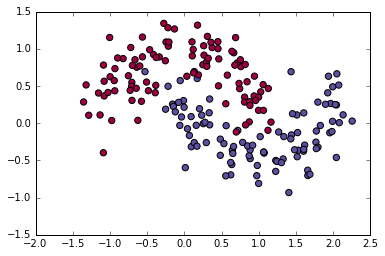

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline
import sklearn
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [8]:
np.random.seed(0)
n_input=2
n_hidden=100
n_output=2
W1=np.random.rand(n_input,n_hidden)
b1=np.random.rand(n_hidden)
W2=np.random.rand(n_hidden,n_output)
b2=np.random.rand(n_output)


In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def der_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))
epsilon=0.01
reg_lambda=0.01

In [ ]:
for i in range(20000):
    a2=X.dot(W1)+b1
    z2=sigmoid(a2)
    
    a3=z2.dot(W2)+b2
    value=np.exp(a3)
    z3=value/(np.sum(value,axis=1,keepdims=True))
    
    loss=z3[range(len(X)),y]
    energy=np.sum(-np.log(loss))
    energy+=reg_lambda*(np.sum(np.square(W1))+np.sum(np.square(W2)))
    if energy and i%1000==0:
        print 'iteration %i: %f' %(i,energy)
    
    
    delta3=z3
    delta3[range(len(X)),y]=delta3[range(len(X)),y]-1
    
    dw2=z2.T.dot(delta3)
    db2=np.sum(delta3,axis=0)
    
    delta2=delta3.dot(W2.T)*der_sigmoid(a2)
    
    dw1=X.T.dot(delta2)
    db1=np.sum(delta2,axis=0)
    
    dw1+=reg_lambda*W1
    dw2+=reg_lambda*W2
    
    
    W1+=-epsilon*dw1
     
    W2+=-epsilon*dw2
     
    b1+=-epsilon*db1
     
    b2+=-epsilon*db2


In [ ]:
def prediction(W1,W2, b1,b2,X):
    a2=X.dot(W1)+b1
    z2=sigmoid(a2)
    
    a3=z2.dot(W2)+b2
    value=np.exp(a3)
    z3=value/(np.sum(value))  
    return np.argmax(z3)



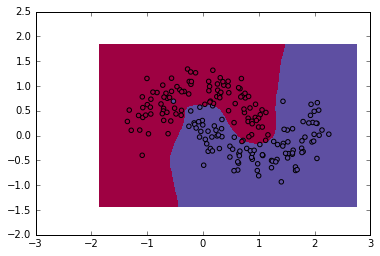

In [12]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = (np.c_[xx.ravel(), yy.ravel()])

m=Z.shape[0]
labels=[]
for i in range(m):
    myvalue=prediction(W1,W2, b1,b2,Z[i])
    if myvalue==1:
        label=1
    elif myvalue==0:
        label=0
    labels.append(label)
    
labels=np.array(labels)
labels=labels.reshape(xx.shape)
plt.pcolormesh(xx, yy, labels, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()
    